In [1]:
%matplotlib inline

# Forcing mechanisms for drifters entering and exiting Galveston Bay

An on-going area of interest for response efforts at the Texas General Land Office is under what conditions oil may exit or enter a given bay. Here, we limit our scope to Galveston Bay and use statistics to find relationships between drifter entrances/exits and potential forcing mechanisms.

## Relevant previous effort

This work builds on already-existing shelf model output (DJ's [20 year hindcast](http://barataria.tamu.edu:8080/thredds/dodsC/NcML/txla_hindcast_agg)) and Dongyu's effort to blended the "coarse" resolution Galveston Bay model with the shelf model to create a blended model product for seamlessly running drifters. The drifter simulations here are run using the blended model product.

## Run the drifters

The drifters were run on hafen (`/raid/home/kthyng/projects/bay/`) using the run.py script. Pertinent simulation details:

* Output drifter locations every 15 minutes
* Ran forward/backward for 14 days
* Circulation model output is hourly
* Surface drifters
* No subgrid diffusion
* 300 meter initial distance between drifters
* Drifters started in uniform array within bay
* Simulations are started from 4 dates:
 * 2010-02-01: winter winds, high river discharge
 * 2011-02-01: winter winds, low river discharge
 * 2010-07-01: summer winds, high river discharge
 * 2011-07-01: summer winds, low river discharge
* Simulations are run forward from the dates listed above, and backward from 2 weeks after the dates listed above. That is, the forward- and backward-running simulations are simulataneous but represent drifters exiting and entering the domain (respectively).
* New simulations are started every 4 hours for 2 weeks for a total number of simulations of: 6 * 14=84 simulations for each set (i.e. season and run direction)
* Each simulation has 13,340 drifters, so each set (i.e. season and run direction) has 13340 * 84=1,120,560 drifters or over 1.1 million.

Note that the appropriate file names for these simulations fit the pattern: `2010-02-01_forward_14days_dx300` (or backward).

The simulations have already been run using:

    python2 run.py > logs/[etc] &

The drifter tracks are stored on hafen in `tracks`.

The figure below shows the initial drifter locations.
![](figures/starting_points_bay_dx300.png)

## When are drifters moving between the bay and the shelf?

### Run the analysis
This analysis was run with calcs.io() with changing refdates through the simulation start dates (2010-02-01, 2011-02-01, 2010-07-01, 2011-07-01) and also the backward-running simulations (2010-02-15, 2011-02-15, 2010-07-15, 2011-07-15). This gives files of the pattern `calcs/enterexit_sim3_[yyyy]-[mm]-forward_14days_dx300` (or backward).

I calculate the number of drifters that are outside of the bay at each time step, or within the polygon plotted below.

ALSO EXPLAIN THE .npz FILES MAKING NOW. PROBABLY NEED TO UPDATE CODE SO THAT IT RUNS WITHOUT CHANGING THE __NAME__

//anaconda/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


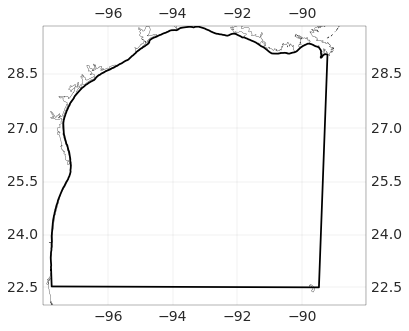

In [8]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import calcs

baypathll = calcs.baypath(which='ll')
fig = plt.figure(figsize=(6,5))
ax = plt.axes(projection=ccrs.Mercator(central_longitude=-85.0))
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
ax.set_extent([-98, -88, 22, 29.8], ccrs.PlateCarree())
ax.coastlines(resolution='10m')  # coastline resolution options are '110m', '50m', '10m'
plt.plot(baypathll.vertices[:,0], baypathll.vertices[:,1], 'k', transform=ccrs.PlateCarree())

### Calculate dataframes
Summarize into a `pandas` dataframe the forcing mechanisms (read in from the blended model product, the shelf model, etc) for each time period and combine it with the time series summary of when drifters are outside the domain. Do this using `calcs.make_dfs()`, and the files are in the form `df_2010-02_backward.csv`.

This was all done on hafen, but the df files have been copied to Tahoma too.

#### Drifters exiting domain: Feb 2010

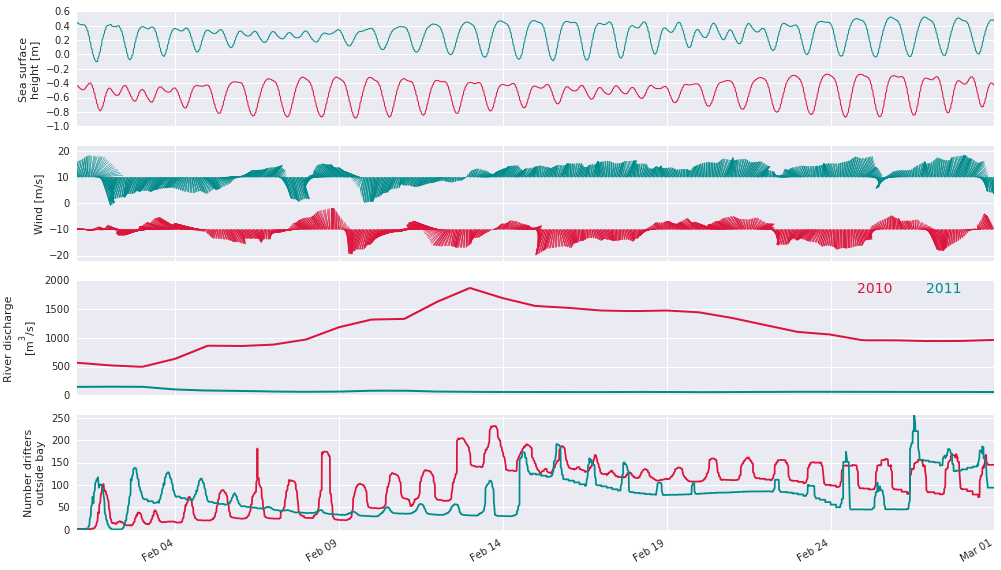

In [1]:
%matplotlib inline
import plots
plots.conditions(season='winter', direction='forward')

#### Drifters exiting domain: July 2010

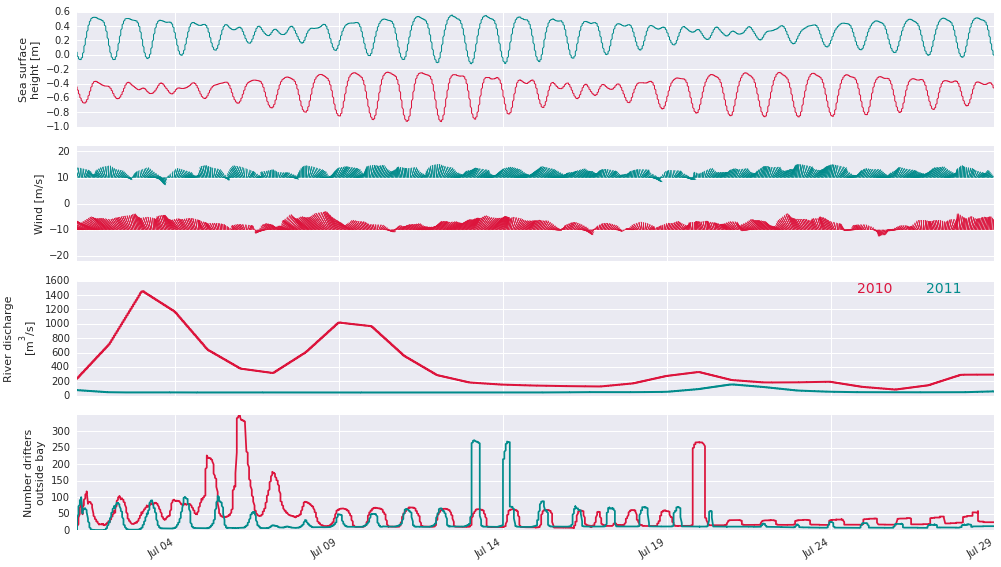

In [3]:
plots.conditions(season='summer', direction='forward')

## Find relationships between drifter behavior and forcing mechanisms for each set of simulations individually

Run statistics in calcs.stats().

subtidal vs. tidal


In [1]:
import calcs
calcs.stats(which='subtidal', direction='forward')

Simulation set: calcs/df_2010-02_forward.csv
Number of combinations checked: 125
Top adjusted r^2, lowest BIC performers, no p>0.1: 14
Adjusted r^2: 0.93
BIC: 398
coefficients: 
Intercept       -25.902040
uwind             0.089143
theta           -13.320607
river_shifted     0.811156
pvalues: 
uwind            6.969932e-64
theta            0.000000e+00
river_shifted    0.000000e+00

Adjusted r^2: 0.93
BIC: 540
coefficients: 
Intercept       -26.152164
theta           -13.434107
sustr             0.053452
river_shifted     0.823441
pvalues: 
theta            0.000000e+00
sustr            5.152116e-33
river_shifted    0.000000e+00

Adjusted r^2: 0.92
BIC: 659
coefficients: 
Intercept       -27.333969
s                -0.029264
theta           -14.061899
river_shifted     0.837479
pvalues: 
s                7.914147e-07
theta            0.000000e+00
river_shifted    0.000000e+00

Adjusted r^2: 0.92
BIC: 678
coefficients: 
Intercept       -26.978571
vwind            -0.012444
theta       

# Feb 2010

Note: What does the -BIC mean in analysis above (now not shown)? Seems like both worse r^2 and more parameters.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      drifters_subtidal   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.137e+04
Date:                Wed, 29 Mar 2017   Prob (F-statistic):               0.00
Time:                        22:30:06   Log-Likelihood:                -183.62
No. Observations:                2495   AIC:                             375.2
Df Residuals:                    2491   BIC:                             398.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       -25.9020      0.385    -67.303      0.000       -26.657   -25.147
uwind             0.0891      0.005     17.370      0.000         0.079     0.099
theta           -13.3206      0.215    -61.963      0.000       -13.742   -12.899
river_shifted     0.8112      0.006    138.041      0.000         0.800     0.823
==============================================================================
Omnibus:                      274.328   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.767
Skew:                          -0.907   Prob(JB):                     8.38e-81
Kurtosis:                       3.504   Cond. No.                         281.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

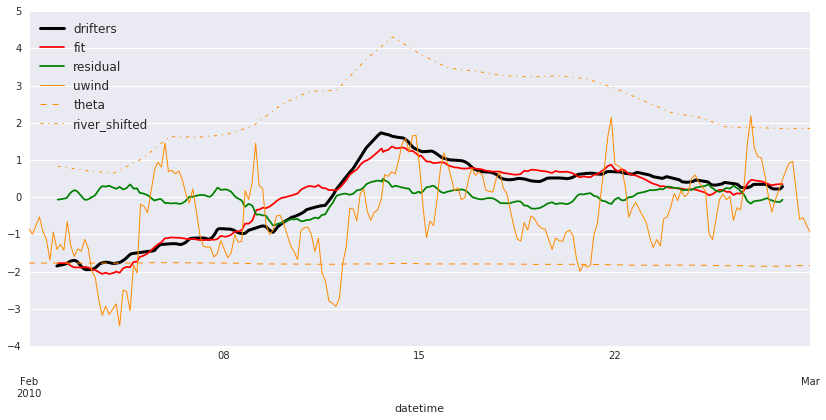

In [1]:
%matplotlib inline
from statsmodels.formula.api import ols
import pandas as pd
import plots
import calcs

cols = ['uwind', 'theta', 'river_shifted']
df = pd.read_csv('calcs/df_2010-02_forward.csv', parse_dates=True, index_col=0)
dfscaled = calcs.scaled(df, cols)
model = ols('drifters_subtidal ~ ' + ' + '.join(cols), data=dfscaled).fit()
plots.fit(model, dfscaled, cols)
model.summary()


#### Feb 2011

CROSS CORRELATIONS TO SHIFT RIVER RELATIVE TO DRIFTERS MUST BE WRONG FOR SOME OF THESE.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      drifters_subtidal   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     916.4
Date:                Wed, 29 Mar 2017   Prob (F-statistic):               0.00
Time:                        23:14:43   Log-Likelihood:                -2616.0
No. Observations:                2498   AIC:                             5240.
Df Residuals:                    2494   BIC:                             5263.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -92.3523      1.893    -48.782      0.000       -96.065   -88.640
uwind          0.2503      0.015     16.435      0.000         0.220     0.280
theta        -52.6167      1.099    -47.867      0.000       -54.772   -50.461
river          2.1202      0.276      7.674      0.000         1.578     2.662
==============================================================================
Omnibus:                       10.342   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                7.966
Skew:                           0.015   Prob(JB):                       0.0186
Kurtosis:                       2.725   Cond. No.                         334.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

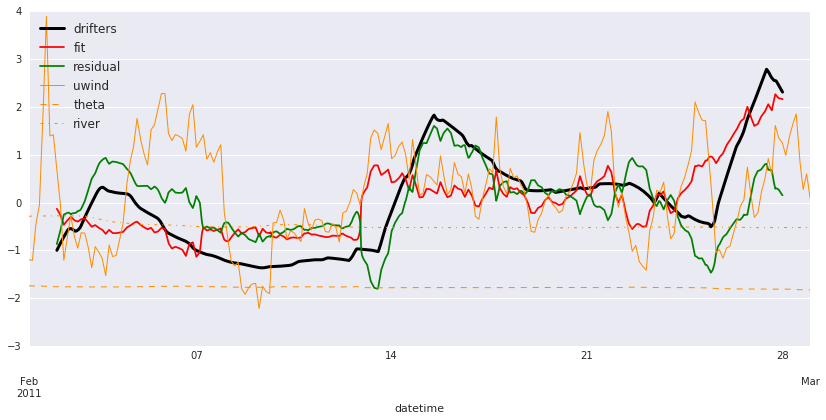

In [6]:
%matplotlib inline
from statsmodels.formula.api import ols
import pandas as pd
import plots
import calcs

cols = ['uwind', 'theta', 'river']
df = pd.read_csv('calcs/df_2011-02_forward.csv', parse_dates=True, index_col=0)
dfscaled = calcs.scaled(df, cols)
model = ols('drifters_subtidal ~ ' + ' + '.join(cols), data=dfscaled).fit()
plots.fit(model, dfscaled, cols)
model.summary()


In [5]:
dfscaled['river_shifted']

datetime
2011-02-01 00:00:00         NaN
2011-02-01 00:15:00         NaN
2011-02-01 00:30:00         NaN
2011-02-01 00:45:00         NaN
2011-02-01 01:00:00         NaN
2011-02-01 01:15:00         NaN
2011-02-01 01:30:00         NaN
2011-02-01 01:45:00         NaN
2011-02-01 02:00:00         NaN
2011-02-01 02:15:00         NaN
2011-02-01 02:30:00         NaN
2011-02-01 02:45:00         NaN
2011-02-01 03:00:00         NaN
2011-02-01 03:15:00         NaN
2011-02-01 03:30:00         NaN
2011-02-01 03:45:00         NaN
2011-02-01 04:00:00         NaN
2011-02-01 04:15:00         NaN
2011-02-01 04:30:00         NaN
2011-02-01 04:45:00         NaN
2011-02-01 05:00:00         NaN
2011-02-01 05:15:00         NaN
2011-02-01 05:30:00         NaN
2011-02-01 05:45:00         NaN
2011-02-01 06:00:00         NaN
2011-02-01 06:15:00         NaN
2011-02-01 06:30:00         NaN
2011-02-01 06:45:00         NaN
2011-02-01 07:00:00         NaN
2011-02-01 07:15:00         NaN
                         ...   

#### July 2010

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      drifters_subtidal   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.137e+04
Date:                Wed, 29 Mar 2017   Prob (F-statistic):               0.00
Time:                        22:30:06   Log-Likelihood:                -183.62
No. Observations:                2495   AIC:                             375.2
Df Residuals:                    2491   BIC:                             398.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       -25.9020      0.385    -67.303      0.000       -26.657   -25.147
uwind             0.0891      0.005     17.370      0.000         0.079     0.099
theta           -13.3206      0.215    -61.963      0.000       -13.742   -12.899
river_shifted     0.8112      0.006    138.041      0.000         0.800     0.823
==============================================================================
Omnibus:                      274.328   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.767
Skew:                          -0.907   Prob(JB):                     8.38e-81
Kurtosis:                       3.504   Cond. No.                         281.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

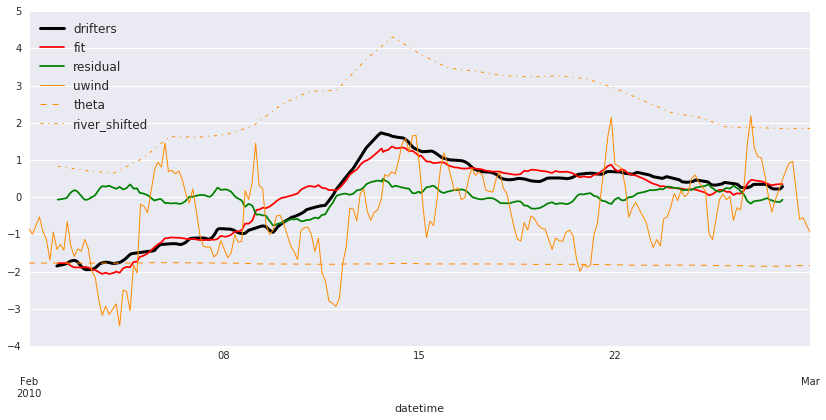

In [1]:
%matplotlib inline
from statsmodels.formula.api import ols
import pandas as pd
import plots
import calcs

cols = ['uwind', 'theta', 'river_shifted']
df = pd.read_csv('calcs/df_2010-07_forward.csv', parse_dates=True, index_col=0)
dfscaled = calcs.scaled(df, cols)
model = ols('drifters_subtidal ~ ' + ' + '.join(cols), data=dfscaled).fit()
plots.fit(model, dfscaled, cols)
model.summary()


#### July 2011

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      drifters_subtidal   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     1470.
Date:                Wed, 29 Mar 2017   Prob (F-statistic):               0.00
Time:                        22:34:49   Log-Likelihood:                -2166.4
No. Observations:                2363   AIC:                             4341.
Df Residuals:                    2359   BIC:                             4364.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        -0.5448      0.016    -34.142      0.000        -0.576    -0.513
uwind            -0.3968      0.014    -27.892      0.000        -0.425    -0.369
s                -0.2437      0.015    -16.045      0.000        -0.273    -0.214
river_shifted     0.8490      0.014     62.866      0.000         0.823     0.875
==============================================================================
Omnibus:                       84.054   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.339
Skew:                           0.385   Prob(JB):                     2.65e-17
Kurtosis:                       2.571   Cond. No.                         2.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

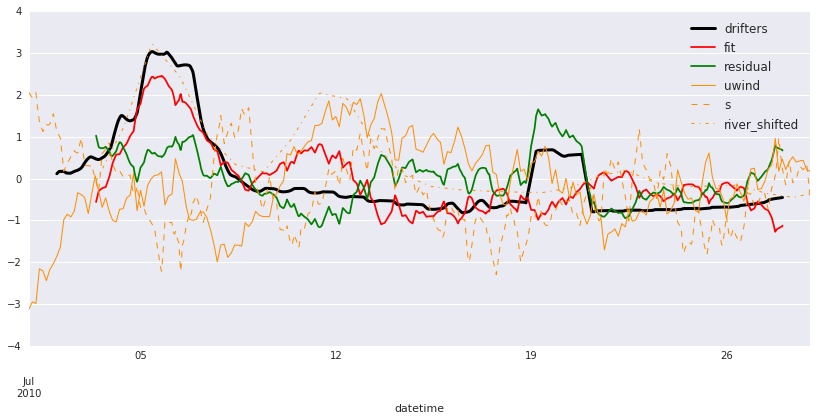

In [2]:
%matplotlib inline
from statsmodels.formula.api import ols
import pandas as pd
import plots
import calcs

cols = ['uwind', 's', 'river_shifted']
df = pd.read_csv('calcs/df_2011-07_forward.csv', parse_dates=True, index_col=0)
dfscaled = calcs.scaled(df, cols)
model = ols('drifters_subtidal ~ ' + ' + '.join(cols), data=dfscaled).fit()
plots.fit(model, dfscaled, cols)
model.summary()


Find that we can explain individual time periods well. But can correlations from one time period produce another? No since the individual results are so different.

### Tidal part

Do we need to explain the tidal part individually? Test: Use subtidal parameters to fit the original signal and see what the residual looks like. Should be tidal and maybe drifters that exit bay enter again afterward. Though then why in Feb 2010 signal do the drifters outside the domain decrease later in the month? Why wouldn't they mostly stay outside?

## Cross-validation

Can we use a larger grouping of time periods in our analysis, then predict another? This is like using more groups for training.

[might need run other cases of conditions. Like since I found that the time for river water exiting the bay in Feb 2010 was 1 day, I could use time periods with less river water maybe.

Here I could look back at the combined river and wind conditions at other times in the blended model product to choose more example if needed. Show plots of the two together.

## Notes to add somewhere

Bayesian information Criterion [(BIC)](https://en.wikipedia.org/wiki/Bayesian_information_criterion)

| ΔBIC   |	Evidence against higher BIC       |
|--------|-------------------------------------|
| 0 to 2 |	Not worth more than a bare mention |
| 2 to 6 | Positive |
| 6 to 10 |	Strong |
| >10 |	Very Strong |


[Scaling variables:](http://stats.stackexchange.com/questions/29781/when-conducting-multiple-regression-when-should-you-center-your-predictor-varia)

>In regression, it is often recommended to center the variables so that the predictors have mean 00. This makes it so the intercept term is interpreted as the expected value of YiYi when the predictor values are set to their means. Otherwise, the intercept is interpreted as the expected value of YiYi when the predictors are set to 0, which may not be a realistic or interpretable situation (e.g. what if the predictors were height and weight?). Another practical reason for scaling in regression is when one variable has a very large scale, e.g. if you were using population size of a country as a predictor. In that case, the regression coefficients may be on a very small order of magnitude (e.g. 10−610−6) which can be a little annoying when you're reading computer output, so you may convert the variable to, for example, population size in millions. The convention that you standardize predictions primarily exists so that the units of the regression coefficients are the same.

>As @gung alludes to and @MånsT shows explicitly (+1 to both, btw), centering/scaling does not effect your statistical inference in regression models - the estimates are adjusted appropriately and the pp-values will be the same.

>Other situations where centering and/or scaling may be useful:

>* when you're trying to sum or average variables that are on different scales, perhaps to create a composite score of some kind. Without scaling, it may be the case that one variable has a larger impact on the sum due purely to its scale, which may be undesirable.
>* To simplify calculations and notation. For example, the sample covariance matrix of a matrix of values centered by their sample means is simply X′XX′X. Similarly, if a univariate random variable XX has been mean centered, then var(X)=E(X2)var(X)=E(X2) and the variance can be estimated from a sample by looking at the sample mean of the squares of the observed values.
>* Related to aforementioned, PCA can only be interpreted as the singular value decomposition of a data matrix when the columns have first been centered by their means.

>Note that scaling is not necessary in the last two bullet points I mentioned and centering may not be necessary in the first bullet I mentioned, so the two do not need to go hand and hand at all times.


[Standardize variables](http://stats.stackexchange.com/questions/13267/how-to-sum-two-variables-that-are-on-different-scales/13271#13271) by:

$C_{scaled} = (C - C_{mean})/ C_{std}$

# Backward-moving

#### Drifters entering domain: Feb 2010 backward

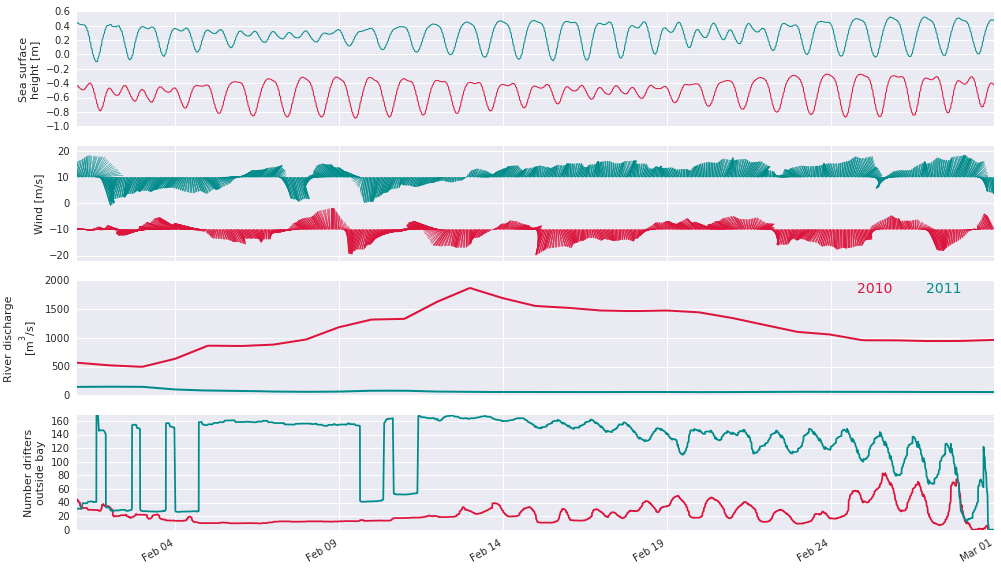

In [2]:
plots.conditions(season='winter', direction='backward')